# Example of Genetic Algorithm Converging on a function

Evolution 0, best child -2310.4098037988474
Evolution 1, best child -127.6628516259666
Evolution 2, best child -19.032956533504663
Evolution 3, best child -8.533273361772082
Evolution 4, best child -8.533273361772082
Evolution 5, best child -8.533273361772082
Evolution 6, best child -8.533273361772082
Evolution 7, best child -8.533273361772082
Evolution 8, best child -8.533273361772082
Evolution 9, best child -8.533273361772082
Evolution 10, best child -8.533273361772082
Evolution 11, best child -6.267624209567817
Evolution 12, best child -6.267624209567817
Evolution 13, best child -6.267624209567817
Evolution 14, best child -6.267624209567817
Evolution 15, best child -6.267624209567817
Evolution 16, best child -2.695276654377783
Evolution 17, best child -2.695276654377783
Evolution 18, best child -2.695276654377783
Evolution 19, best child -2.695276654377783
Evolution 20, best child -2.695276654377783
Evolution 21, best child -2.695276654377783
Evolution 22, best child -2.695276654377

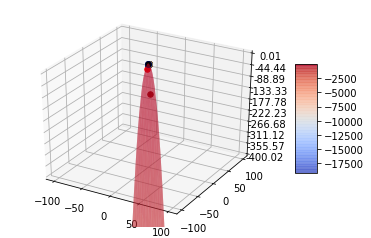

In [3]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
import ann
from time import time


def function_to_maximize(X, Y):
    return -1 * (X**2 + Y**2)


generation_colors = ["#330000", "#880000", "#FF0000", "#333300", "#888800", "#FFFF00",
                     "#333333", "#888888", "#330033", "#880088", "#FF00FF", "#008800",
                     "#00FF00", "#000088", "#0000FF", "#000000"]

generations = len(generation_colors)

# Random Input for giggles
# The input does not really matter in this case
# The evolution algorithm is only dependant on the output
# It will however optimize the input for the output so it's
# rather useful for teaching stuff to play games :)
# eg: create a network with one input per possible action
# in the game and then evolve the network after each round
# depending on the output.

network = ann.ANN(1)

# Some Layers so that the network can learn
network.add_layer(ann.Layer(6))
network.add_layer(ann.Layer(8))

# Output, Should eventually become 0, 0 since that maximizes the function
network.add_layer(ann.Layer(2))

# 10 Family members

# There's a bunch of other options defaults is:
#     def __init__(self, family_sz, selection_bias=0.75, verbose=True,
#                 mutation_chance=0.5, mutation_severity=0.4, inheritance=0.4):

ga = ann.Genetic(20, verbose=False)
ga.create_family(network)

ri = np.array([-10])

fig = plt.figure()
ax = fig.gca(projection='3d')

timestamp = time()
evolution = 0
xs = []
ys = []
zs = []
for _ in range(3):
    for gc in generation_colors:
        evl = []

        abz = 10000
        bestz = None
        bestx = None
        besty = None

        for member in ga:
            timestamp = time()
            x, y = member.prop(ri)

            z = function_to_maximize(x, y)
            if abs(z) < abs(abz):
                abz = abs(z)
                bestz = z
                bestx = x
                besty = y

            evl.append(z)

        ga.evolve(evl)
        print("Evolution {}, best child {}".format(evolution, bestz))

        evolution += 1

        plt.scatter([bestx], [besty], zs=[bestz], s=30, c=gc)



print()
# Make data.
X = np.arange(-100, 100, 0.25)
Y = np.arange(-100, 100, 0.25)
X, Y = np.meshgrid(X, Y)
Z = function_to_maximize(X, Y)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=True, alpha=0.4)

ax.set_zlim(-400.02, 0.01 )
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)

print("Optimal Results would be 0 because the hyperbolic function reaches its maximum at 0")

plt.show()
